In [1]:

######.   https://www.kaggle.com/code/gokulkannan/bank-marketing-campaigns-dataset-opening-deposit
#################################################
#################################################
###########   import python libraryies  #########
#################################################
#################################################

import pandas as pd

import numpy as np

import scipy
###############
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
##########

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier

############

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,KFold

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from imblearn.over_sampling import SMOTE

from scipy.stats import skew,kurtosis,boxcox,boxcox_normmax
###############

from sklearn import metrics

from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,f1_score,recall_score,auc,make_scorer

from sklearn.metrics import confusion_matrix,classification_report

#############

import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
from warnings import filterwarnings
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
from scipy.stats import chi2, chi2_contingency
import scipy

In [2]:
###########################################
###########################################
##########  import dataset   ##############
###########################################
###########################################

df = pd.read_csv('bank_additionall.csv')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Value Counts of the  age column is
 31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64 



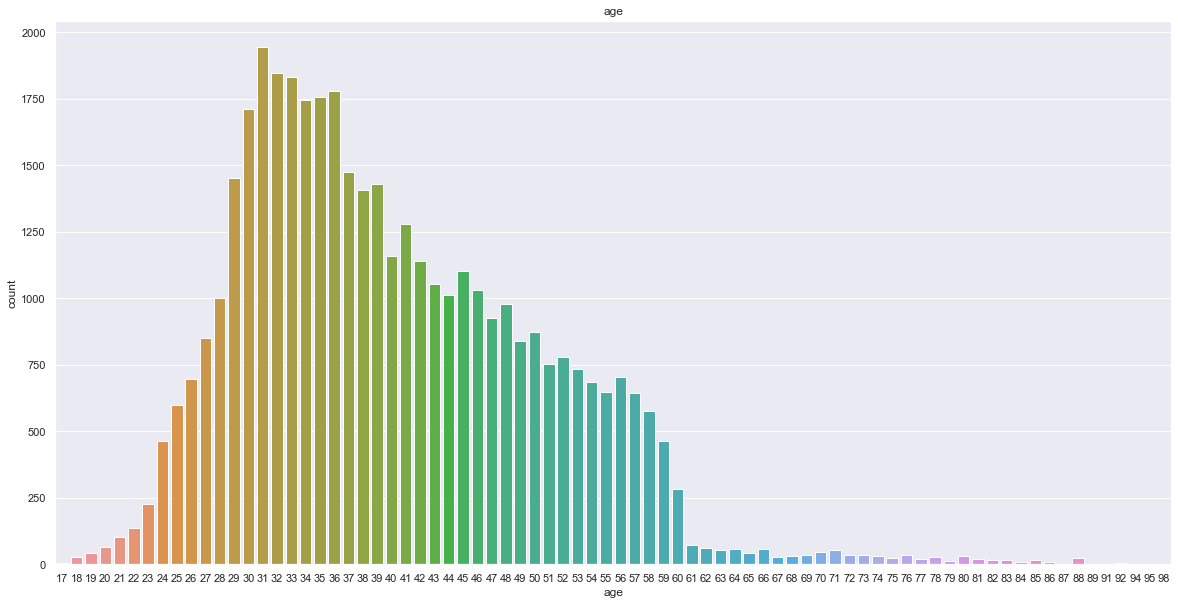


 

Value Counts of the  job column is
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 



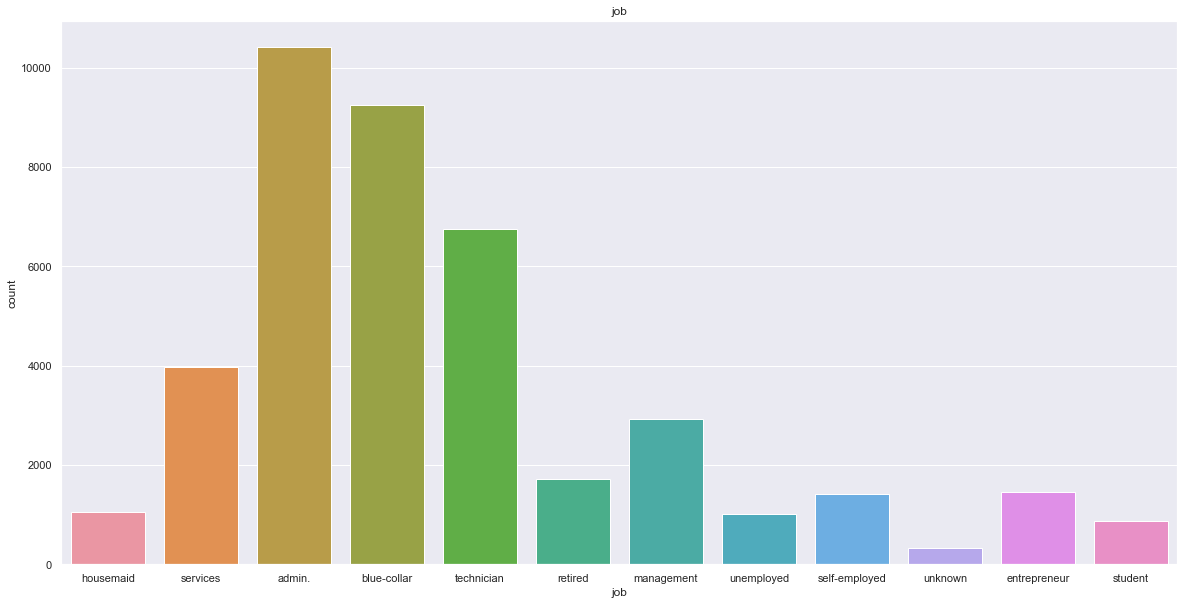


 

Value Counts of the  marital column is
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 



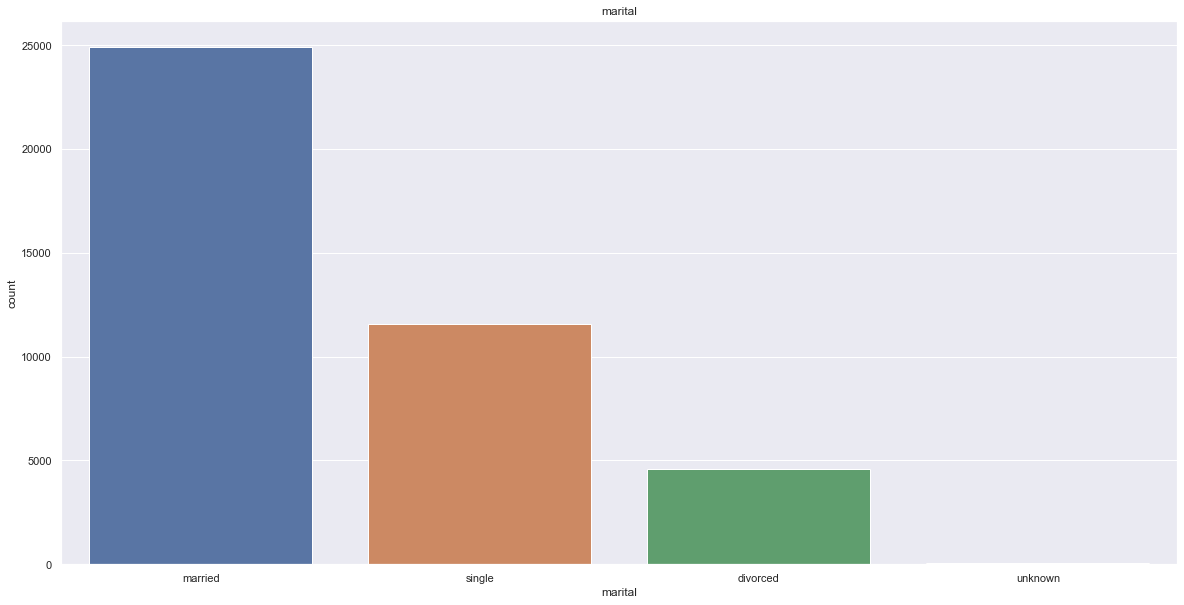


 

Value Counts of the  education column is
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 



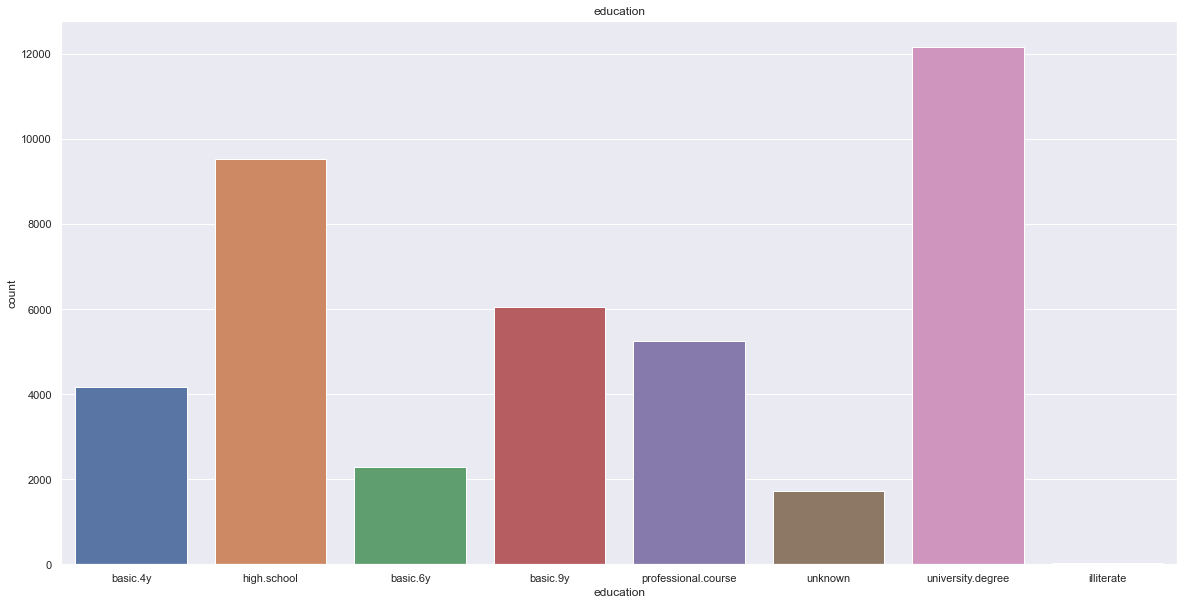


 

Value Counts of the  default column is
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64 



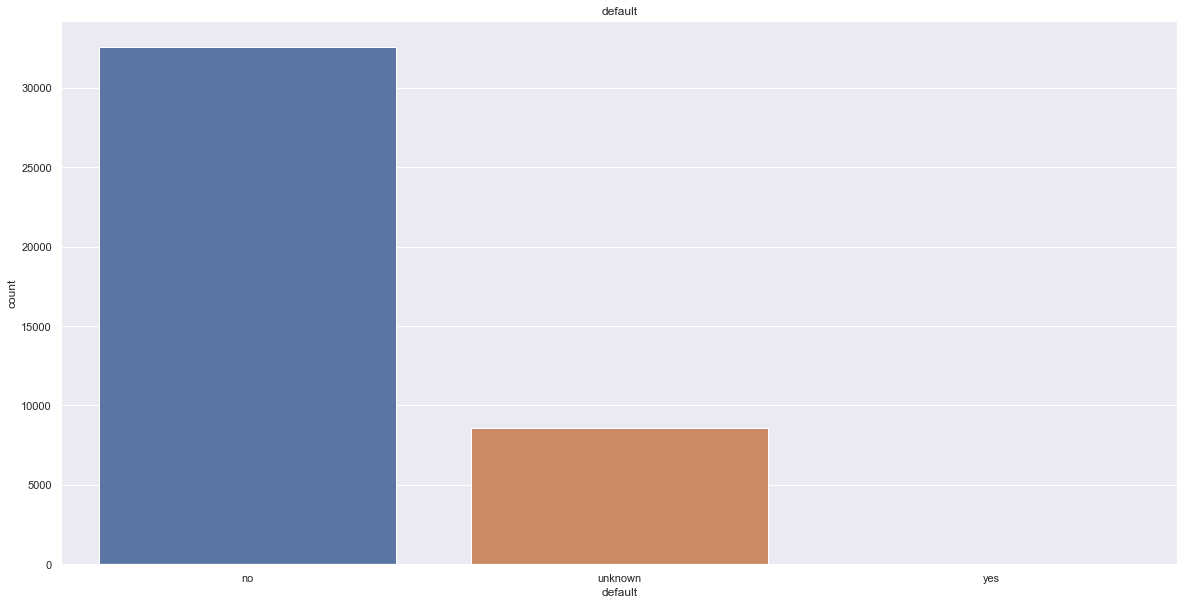


 

Value Counts of the  housing column is
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 



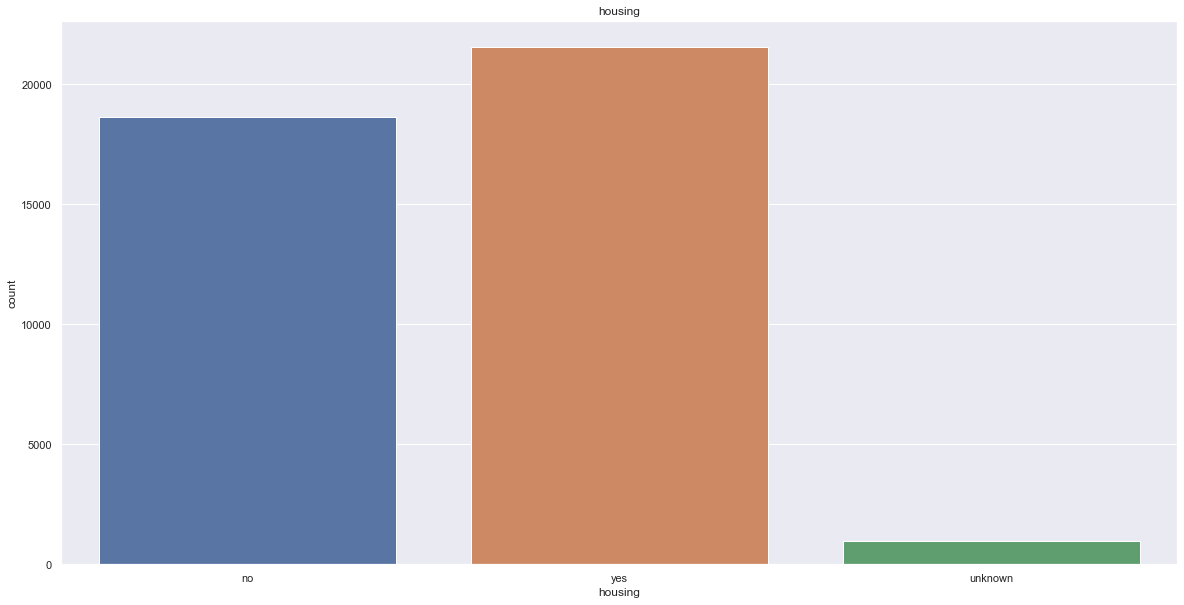


 

Value Counts of the  loan column is
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 



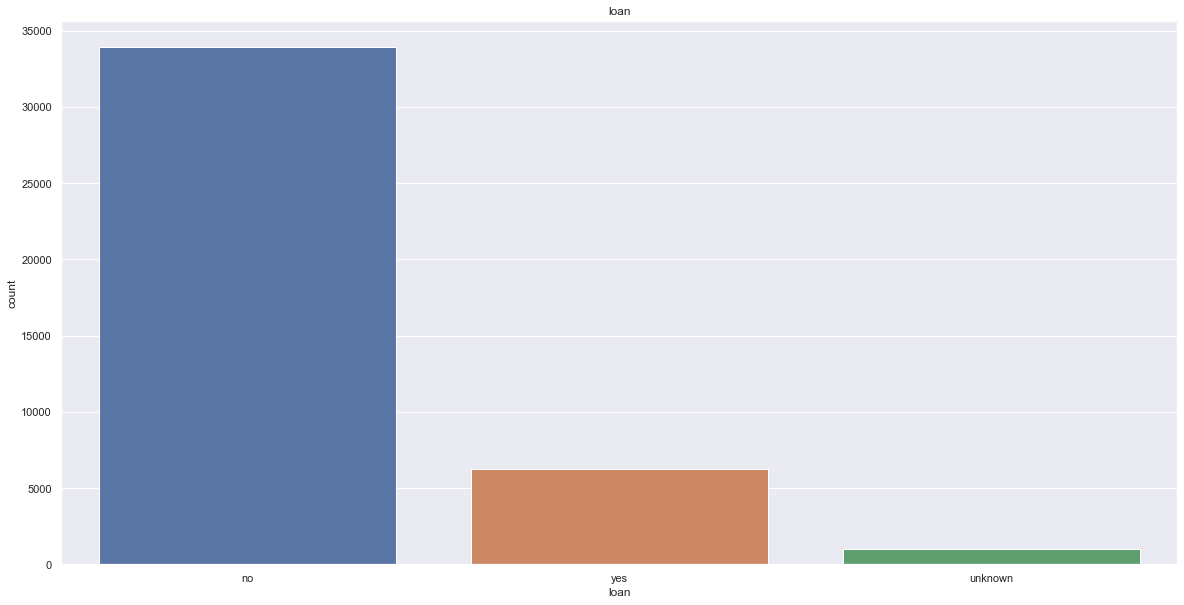


 

Value Counts of the  contact column is
 cellular     26144
telephone    15044
Name: contact, dtype: int64 



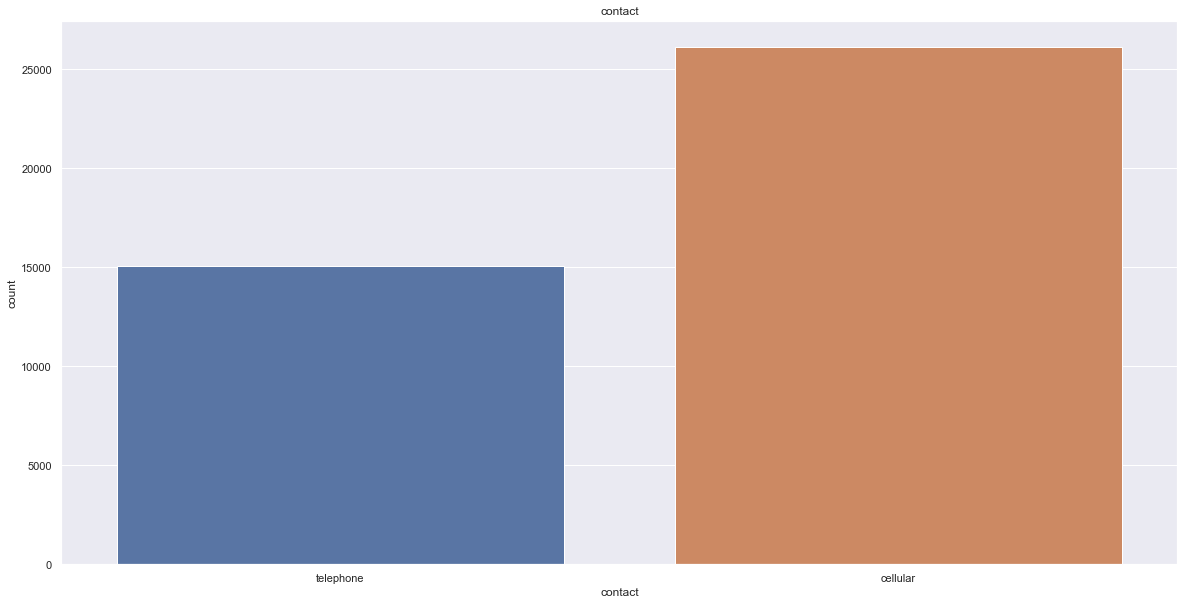


 

Value Counts of the  month column is
 may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64 



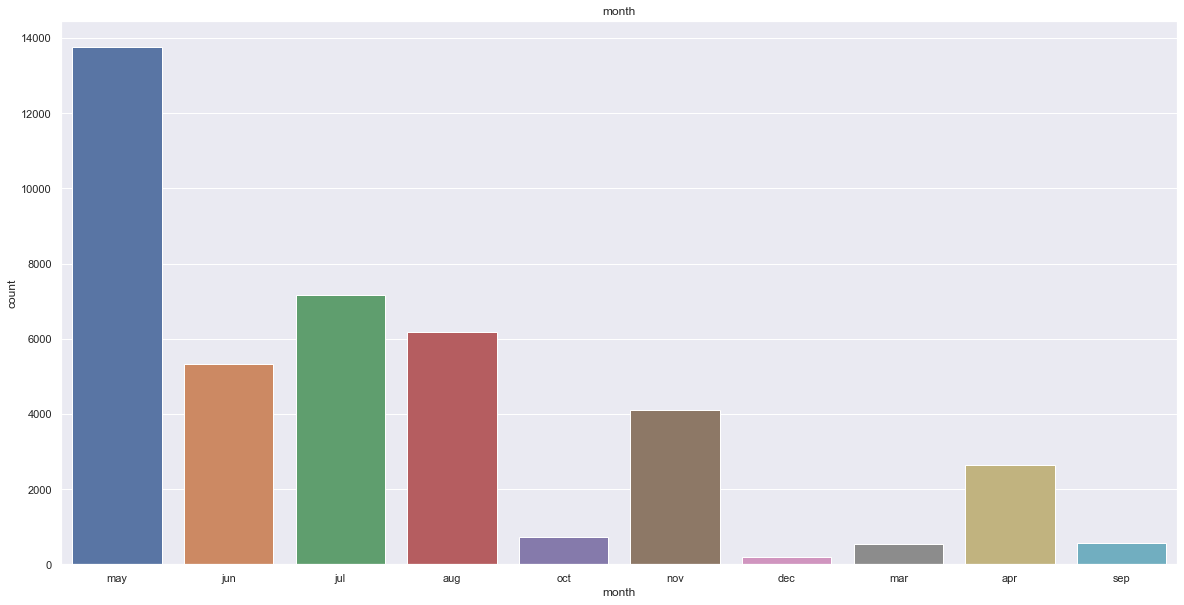


 

Value Counts of the  day_of_week column is
 thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64 



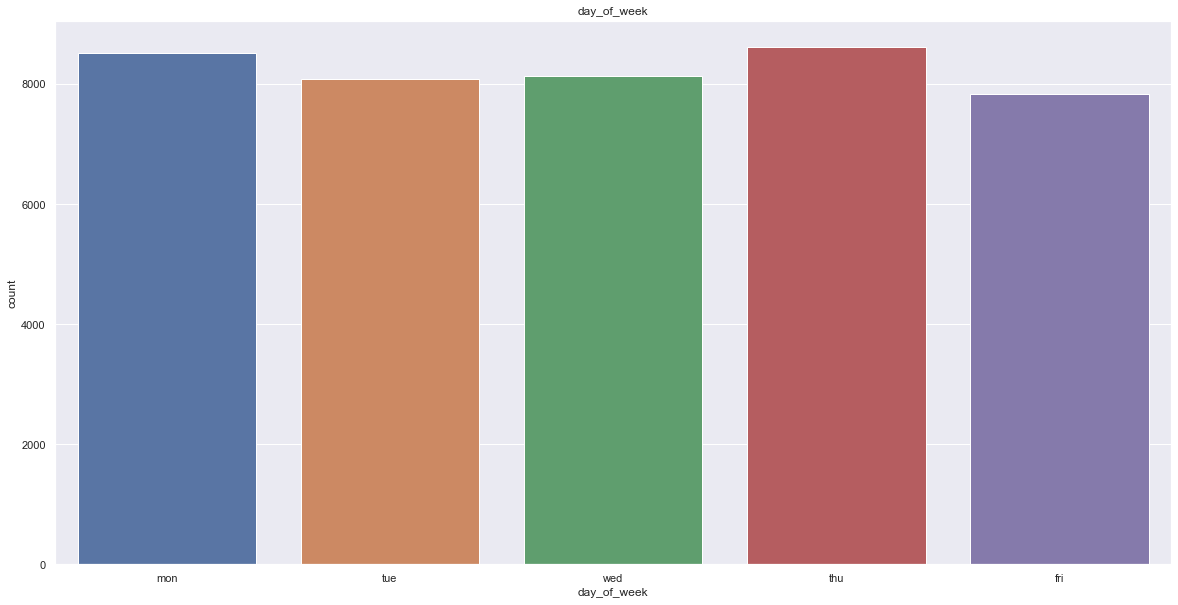


 

Value Counts of the  duration column is
 85      170
90      170
136     168
73      167
124     164
       ... 
1594      1
1530      1
2231      1
1306      1
2015      1
Name: duration, Length: 1544, dtype: int64 



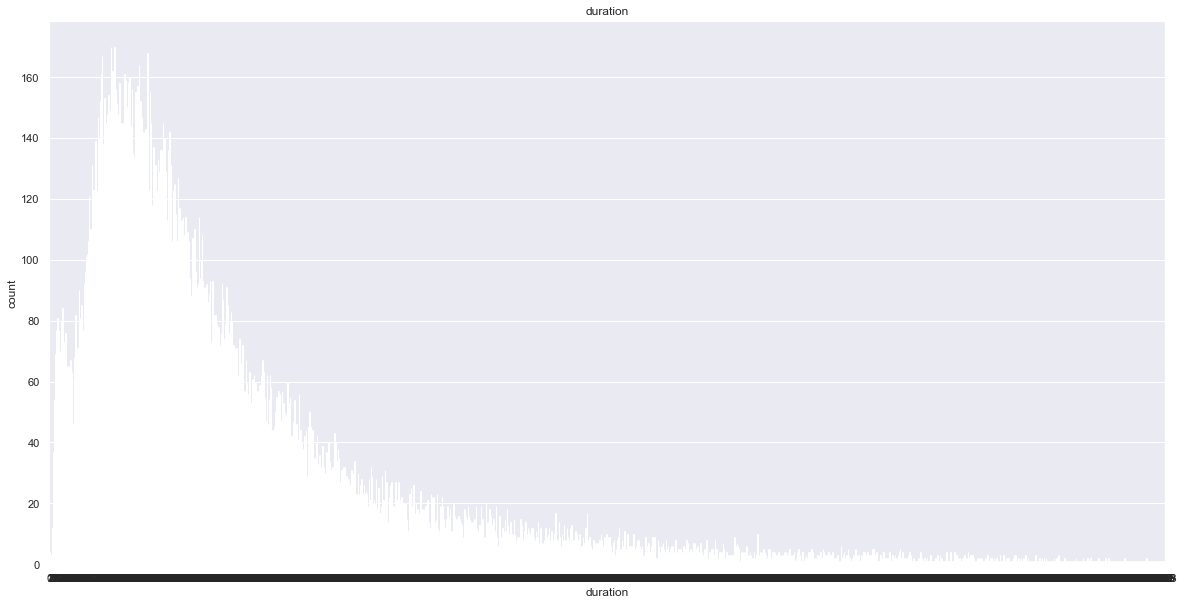


 

Value Counts of the  campaign column is
 1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
26        8
28        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
42        2
40        2
41        1
56        1
39        1
37        1
Name: campaign, dtype: int64 



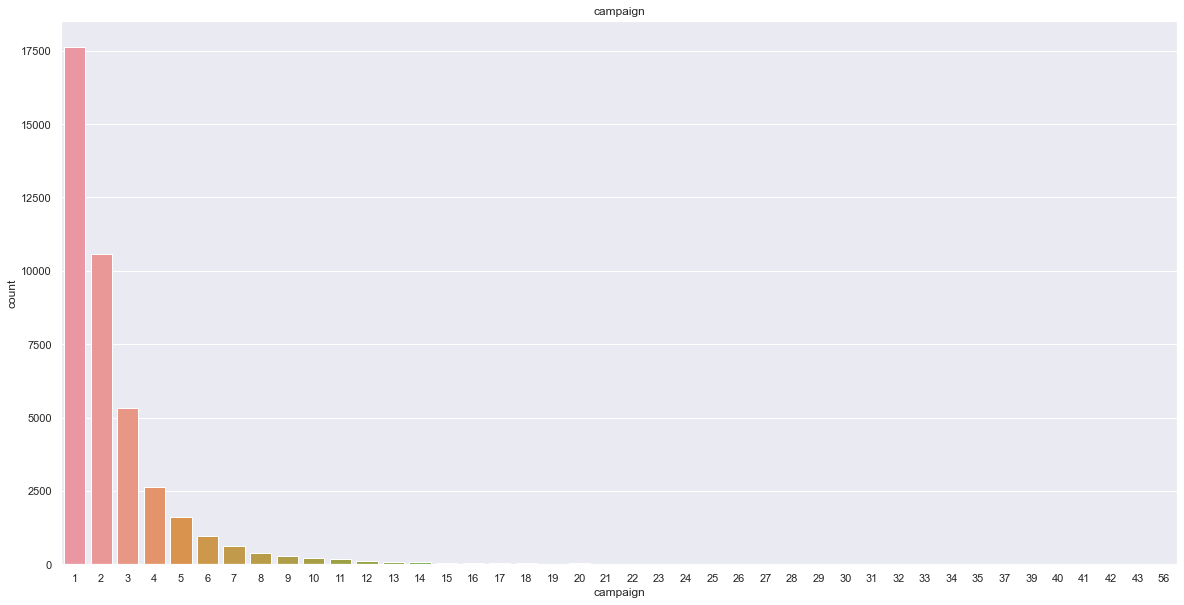


 

Value Counts of the  pdays column is
 999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64 



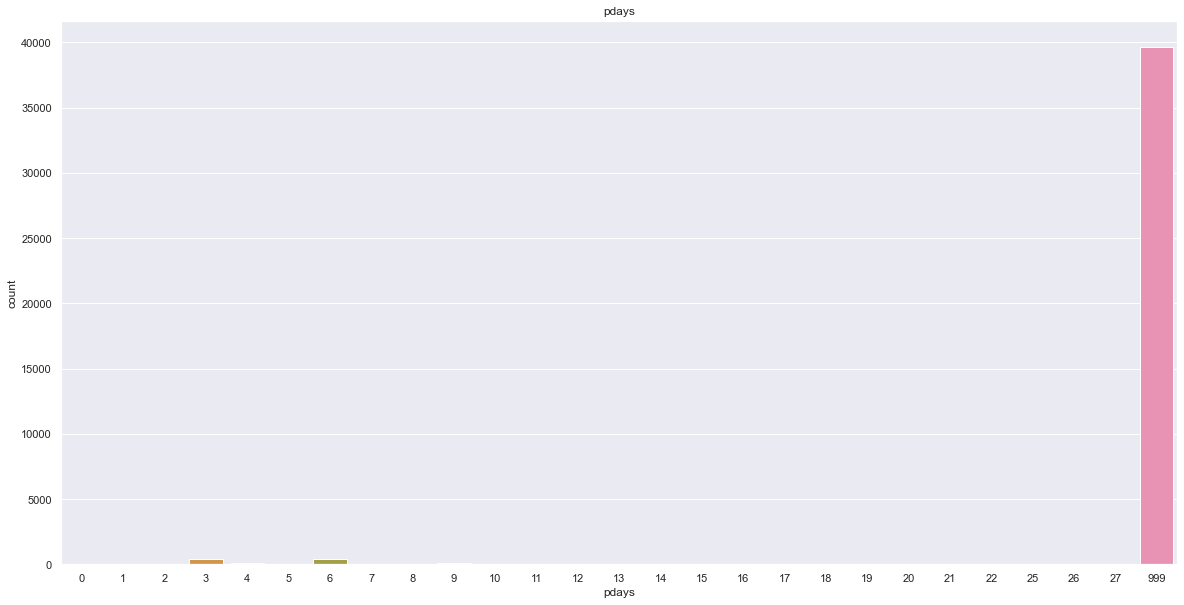


 

Value Counts of the  previous column is
 0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64 



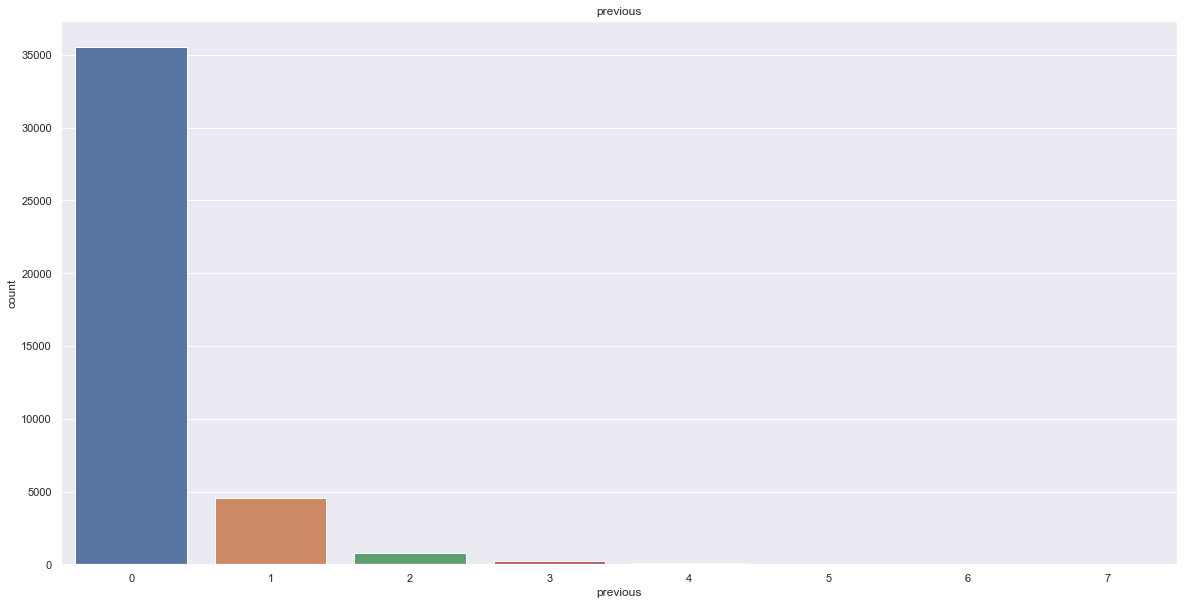


 

Value Counts of the  poutcome column is
 nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64 



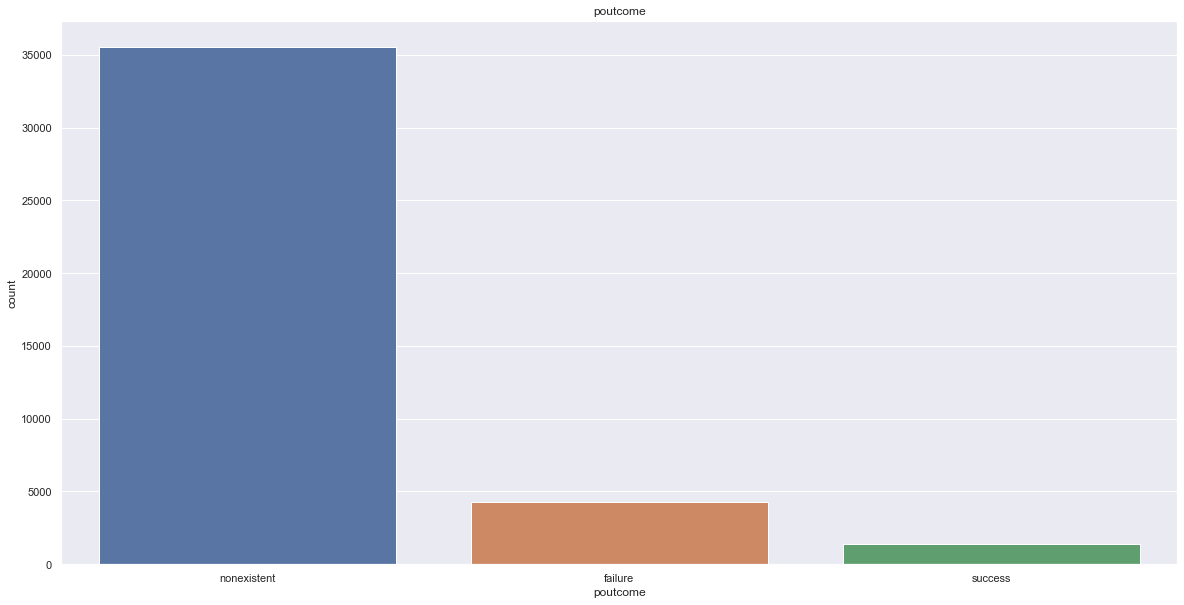


 

Value Counts of the  emp.var.rate column is
  1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64 



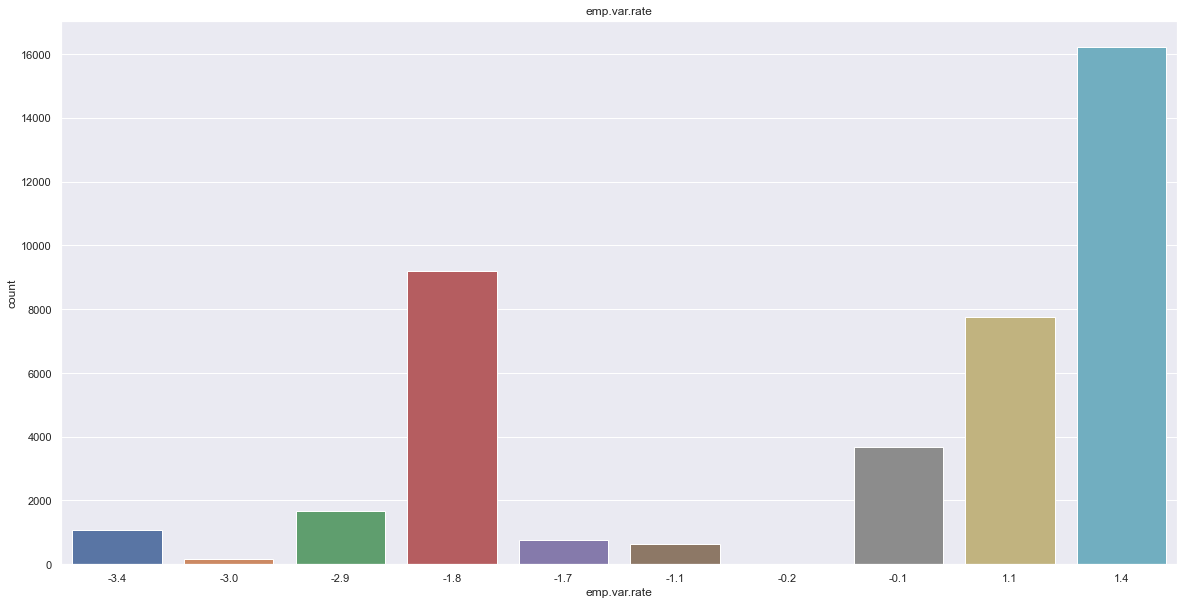


 

Value Counts of the  cons.price.idx column is
 93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64 



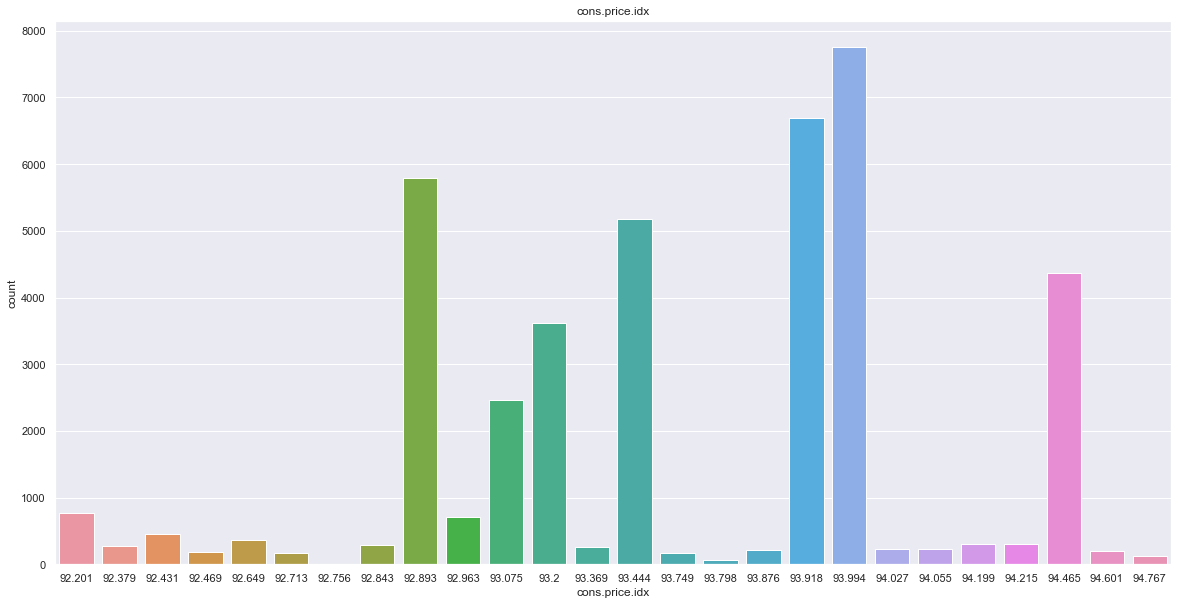


 

Value Counts of the  cons.conf.idx column is
 -36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64 



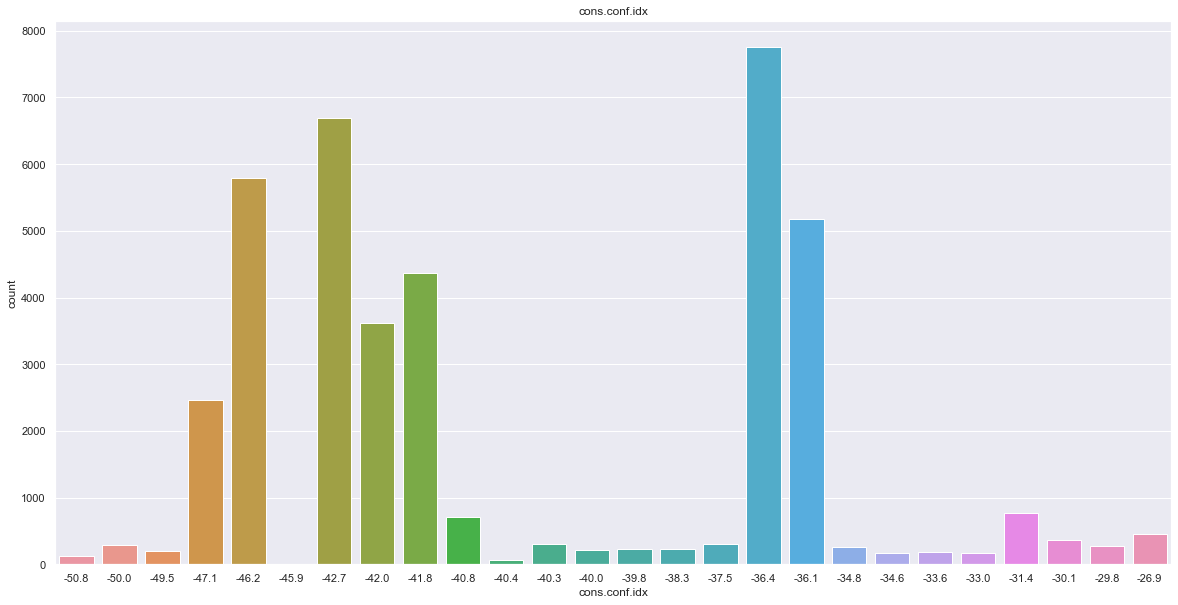


 

Value Counts of the  euribor3m column is
 4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
1.047       1
0.933       1
3.329       1
3.816       1
1.574       1
Name: euribor3m, Length: 316, dtype: int64 



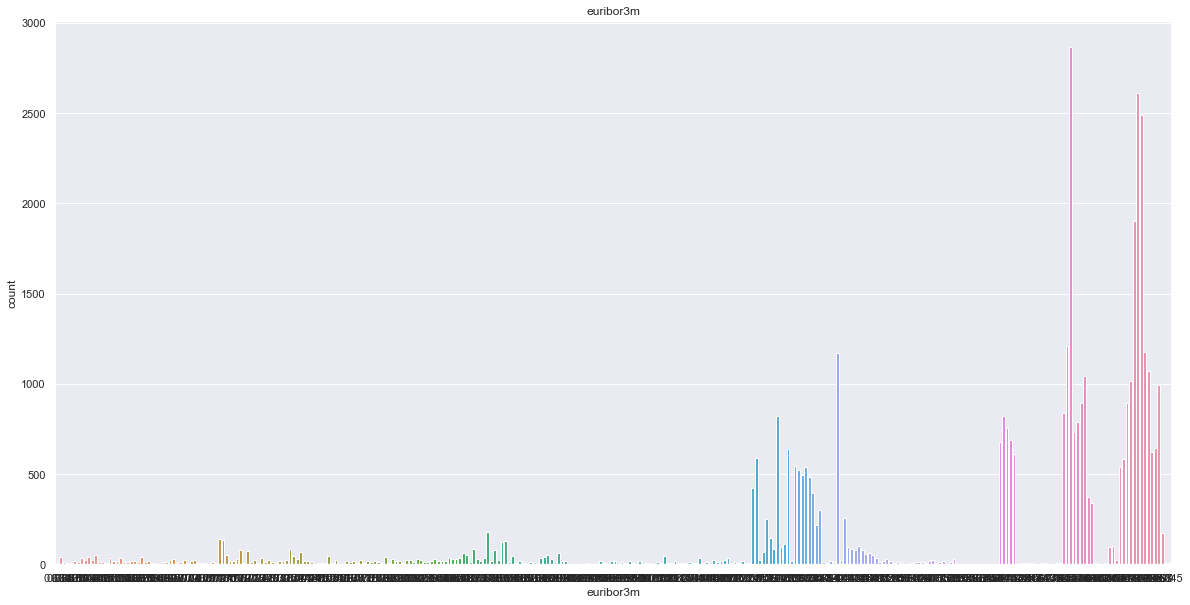


 

Value Counts of the  nr.employed column is
 5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64 



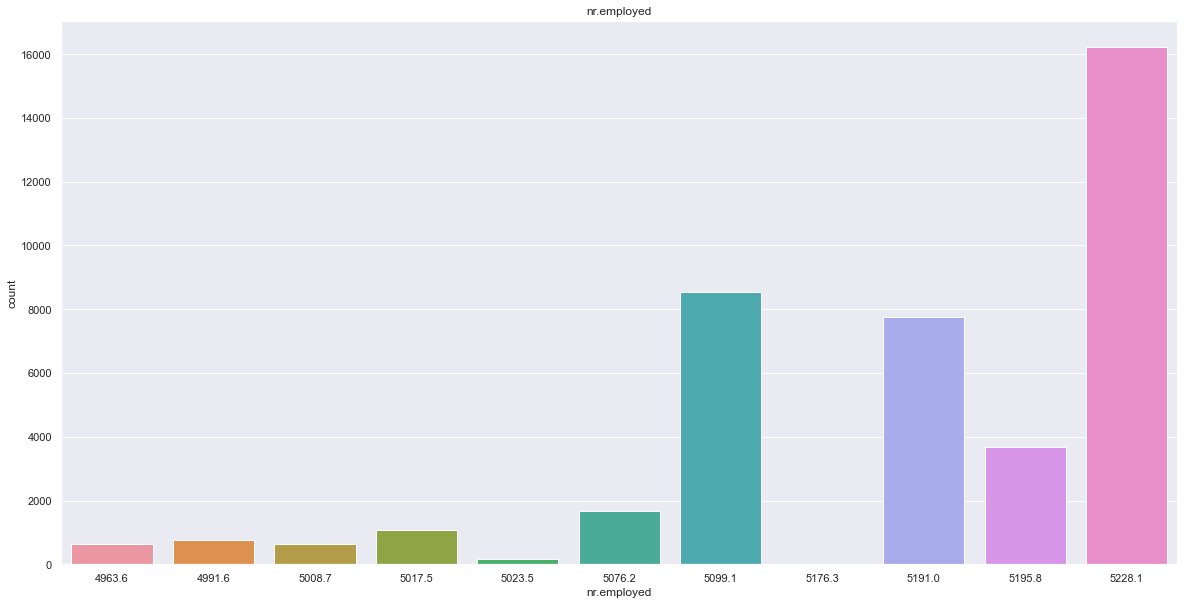


 

Value Counts of the  y column is
 no     36548
yes     4640
Name: y, dtype: int64 



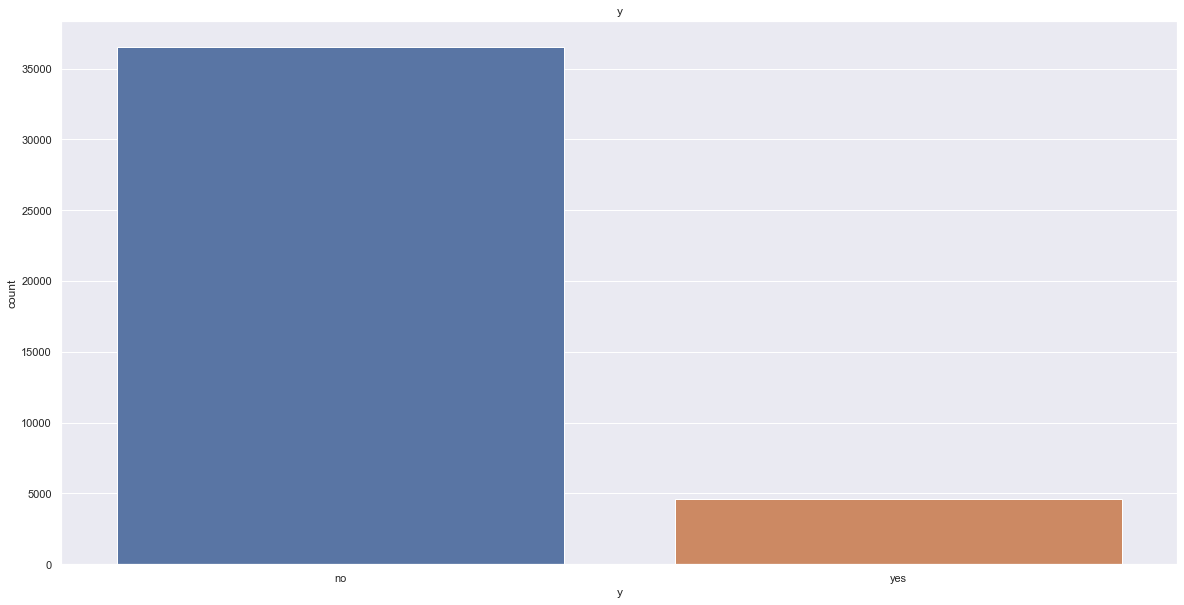

In [3]:
############################################################################ 
############################################################################ 
#################        Analyzing Dataset       ###########################
############################################################################
############################################################################

##### count values of each column debanding on column categories ##########
#####                  creat charte for each column              ##########

for i in df.columns:
    print('Value Counts of the ',i,'column is\n',df[i].value_counts(),'\n')
    sns.set(rc={'figure.figsize':(20,10)})
    sns.countplot(df[i])
  
    plt.title(i)
    plt.show()
    print("\n","\n")

In [4]:
#######################################
#######.  Data preparing    ###########
#######################################



 #######################################
 ######   1- Check duplicates     ######
 #######################################

df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [5]:
                
######################################################
#########    2- remove duplicate data    #############
###################################################### 

df.drop_duplicates(inplace=True)


In [6]:
################################################## 
##########  3-  Resetting Index    ################
################################################## 


df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
################################################## 
#######       4-  check null data       ##########
################################################## 

df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
#################################################### 
###########  5-     Datatype Check     #############
#################################################### 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [9]:
################################################### 
###########     6-     Stats Check   ##############
################################################### 

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
################################################## 
#############.    7-  check column      ##########
################################################## 

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of age')

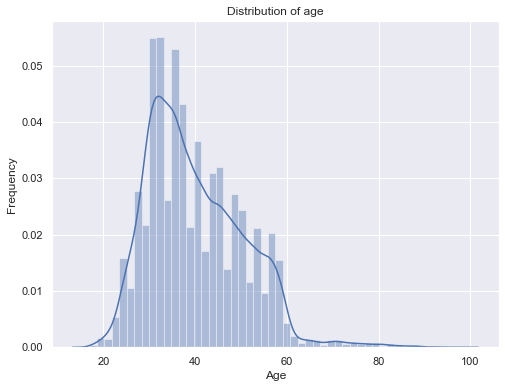

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(df.age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age')

In [12]:
############.  label job column.   ############

df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()
df.job = l_enc.fit_transform(df.job)
df.job.unique()

array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8])

In [14]:
############.  label martial column.   ############ 


print(df.marital.unique())
print(sorted(df.marital.unique()))
df.marital = df.marital.replace(['divorced', 'married', 'single', 'unknown'],[0,1,2,3])

['married' 'single' 'divorced' 'unknown']
['divorced', 'married', 'single', 'unknown']


In [15]:
########.   label Education column     ##########

df.education.unique()
print(sorted(df.education.unique()))
df.education = df.education.replace(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 
                                     'professional.course', 'university.degree', 'unknown'],[0,1,2,3,4,5,6,7])

['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']


In [16]:
########.   label Default column     ##########


df.default.unique()
print(sorted(df.default.unique()))
df.default = df.default.replace(['no', 'unknown', 'yes'],[0,1,2])

['no', 'unknown', 'yes']


In [17]:
########.   label Housing column     ##########

df.housing = df.housing.replace(['no', 'unknown', 'yes'],[0,1,2])

In [18]:
########.   label Loan column     ##########

df.loan = df.loan.replace(['no', 'unknown', 'yes'],[0,1,2])

In [19]:
########.   label Contact column     ##########

df.contact = df.contact.replace(['telephone', 'cellular'],[1,0])

In [20]:
########.   label Month column     ##########

df.month = df.month.replace(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'],range(0,10))

In [21]:
########.   label day_of_week column     ##########

print(sorted(df.day_of_week.unique()))



['fri', 'mon', 'thu', 'tue', 'wed']


In [22]:
df.day_of_week = df.day_of_week.replace(['fri', 'mon', 'thu', 'tue', 'wed'],[0,1,2,3,4])

In [23]:
########.   label poutcome column     ##########

print(sorted(df.poutcome.unique()))

['failure', 'nonexistent', 'success']


In [24]:
df.poutcome = df.poutcome.replace(['failure', 'nonexistent', 'success'],[0,1,2])

In [25]:
#########   Label y - Output Variable or Dependent Variable   ############

df.y.unique()

array(['no', 'yes'], dtype=object)

In [26]:
df.y = df.y.replace(['no', 'yes'],[0,1])

In [27]:
###################################################
###########.  dataset after labeling.   ###########
###################################################

df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
23072,55,9,0,6,0,0,0,0,1,3,...,1,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0
15434,57,1,1,2,1,0,0,0,3,0,...,1,999,0,1,1.4,93.918,-42.7,4.957,5228.1,0
2468,37,1,1,3,0,2,0,1,6,3,...,2,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
36603,31,0,1,6,0,0,0,0,4,2,...,2,999,1,0,-2.9,92.963,-40.8,1.260,5076.2,1
36132,31,0,1,6,0,2,0,0,6,4,...,2,3,1,2,-1.8,92.893,-46.2,1.270,5099.1,0
23351,54,9,1,5,0,2,0,0,1,4,...,10,999,0,1,1.4,93.444,-36.1,4.964,5228.1,0
36070,48,1,1,3,0,0,0,0,6,3,...,2,3,1,2,-1.8,92.893,-46.2,1.266,5099.1,0
7948,36,0,1,6,0,2,0,1,4,1,...,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1,0
16520,53,7,1,3,0,0,2,0,3,4,...,2,999,0,1,1.4,93.918,-42.7,4.963,5228.1,0
24016,41,0,2,3,0,0,0,1,8,3,...,1,999,0,1,-0.1,93.798,-40.4,4.968,5195.8,0


In [28]:
#####################################################
#########    chech dataset depending on    ##########
#########    target value categorise       ##########
#####################################################

df.y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

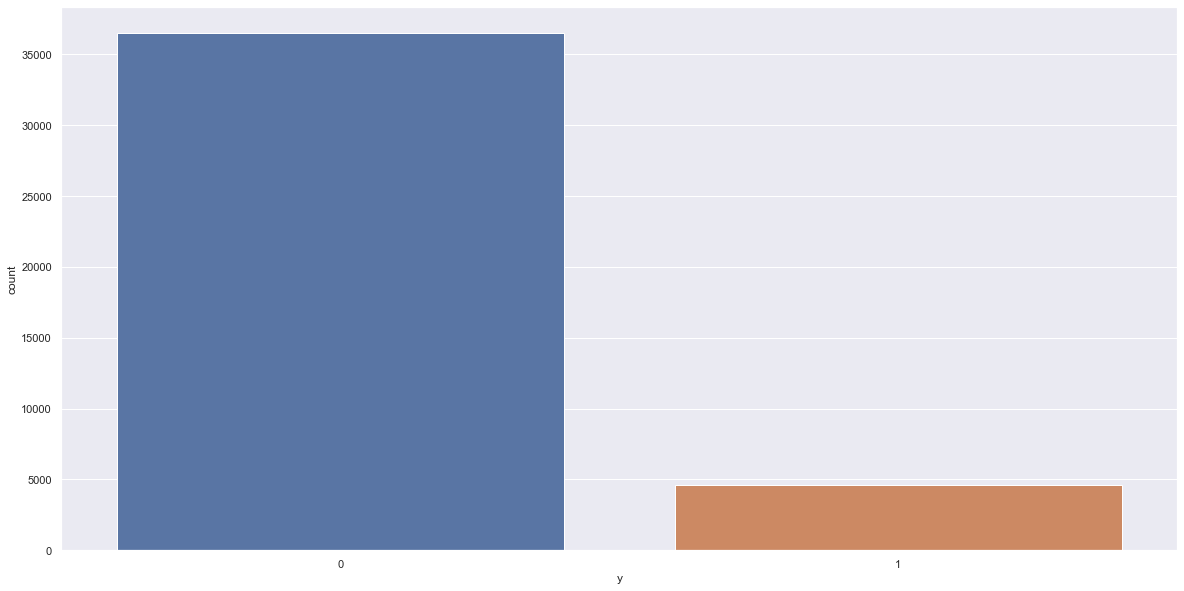

In [29]:
sns.countplot(df.y)

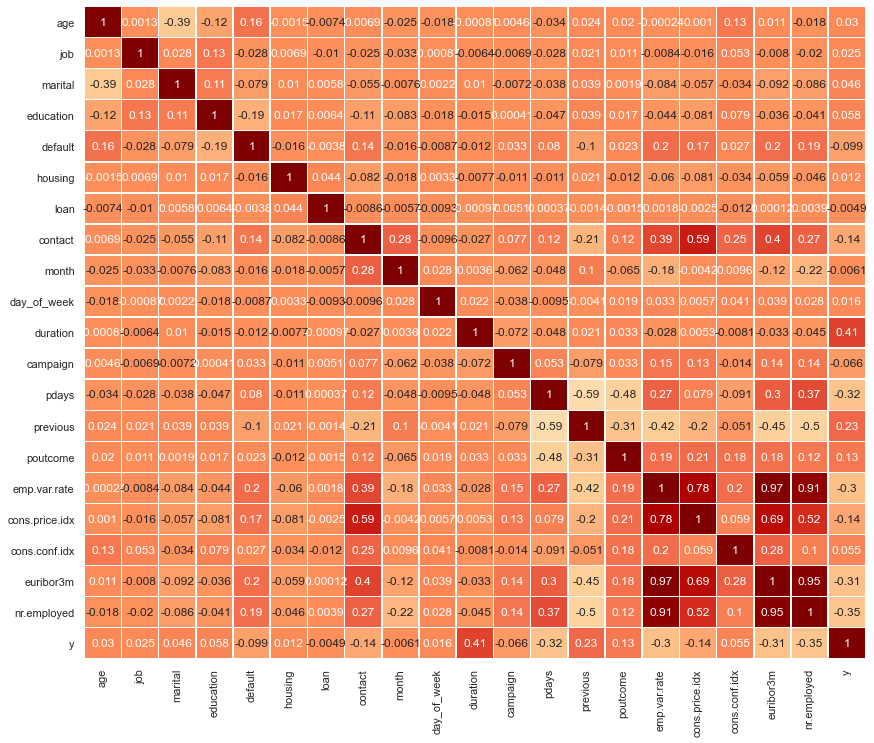

In [30]:
#########################################################################################
##########  Dataset is highly imbalanced so we need to use below technique     ##########
##########    to overcome this problem before the Train Test Split              ##########
#########################################################################################

plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),
            annot=True,
            linewidth=.5,
            center = 0,
            cbar=False,
            cmap='OrRd')
plt.show()

In [31]:
################################################################################
##########      Below columns are highly correlated with another      ##########
##########      input columns except y column, so dropping the same   ##########
################################################################################

df = df.drop(['marital','contact','pdays','previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed','duration'],axis=1)

In [32]:
#########################################################
###########     Dataset After Reducing Column    ########
#########################################################

df

,age,job,education,default,housing,loan,month,day_of_week,campaign,poutcome,y
0,56,3,0,0,0,0,6,1,1,1,0
1,57,7,3,1,0,0,6,1,1,1,0
2,37,7,3,0,2,0,6,1,1,1,0
3,40,0,1,0,0,0,6,1,1,1,0
4,56,7,3,0,0,2,6,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
41171,73,5,5,0,2,0,7,0,1,1,1
41172,46,1,5,0,0,0,7,0,1,1,0
41173,56,5,6,0,2,0,7,0,2,1,0
41174,44,9,5,0,0,0,7,0,1,1,1


In [33]:
X = df.loc[:,df.columns != 'y']
y = df.loc[:,df.columns == 'y']

In [34]:
X

,age,job,education,default,housing,loan,month,day_of_week,campaign,poutcome
0,56,3,0,0,0,0,6,1,1,1
1,57,7,3,1,0,0,6,1,1,1
2,37,7,3,0,2,0,6,1,1,1
3,40,0,1,0,0,0,6,1,1,1
4,56,7,3,0,0,2,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...
41171,73,5,5,0,2,0,7,0,1,1
41172,46,1,5,0,0,0,7,0,1,1
41173,56,5,6,0,2,0,7,0,2,1
41174,44,9,5,0,0,0,7,0,1,1


In [35]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41171,1
41172,0
41173,0
41174,1


In [36]:
########.  OLS Method (Oridinary Least Square) - To Identify Significant Variable

########.   p-value <= 0.05

import statsmodels.api as sm

ols = sm.OLS(y,X).fit()

print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.144
Model:                            OLS   Adj. R-squared (uncentered):              0.144
Method:                 Least Squares   F-statistic:                              692.5
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:58:43   Log-Likelihood:                         -10274.
No. Observations:               41176   AIC:                                  2.057e+04
Df Residuals:                   41166   BIC:                                  2.065e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [37]:
####.   Note : P-value should be less than or equal to 0.05
#####.   From the above result, we are removing the age , loan, month coulumns,because of its P-value > 0.05

df = df.drop(['age','loan','month'],axis =1)
X = df.loc[:,df.columns != 'y']
y = df.loc[:,df.columns == 'y']


In [38]:
#######.     To check class Imbalanced or not.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28823, 7)
(28823, 1)
(12353, 7)
(12353, 1)


In [39]:
y_train.value_counts()

y
0    25618
1     3205
dtype: int64

In [42]:
###########################################################
#############                                  ############
#############     Applied ML Algorthimes       ############
#############     On the Orginal Dataset       ############
#############        Before Balaceing          ############
###########################################################


#########################################
######      1-    KNN           #########
#########################################

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=2)

KNN.fit(X_train,y_train)

KNN_predicted_y = KNN.predict(X_test)

KNN_CM = confusion_matrix(y_test,KNN_predicted_y)
print(KNN_CM)

# Accuracy Score
KNN_Accuracy_Score = round(accuracy_score(y_test,KNN_predicted_y)*100,2)
print('')
print('KNN_Accuracy_Score is ', KNN_Accuracy_Score)
# Classification Report
print(classification_report(y_test,KNN_predicted_y))
print('')
print('')

#########################################
######     2-  RandomForest     #########
#########################################

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0)

RF.fit(X_train,y_train)

RF_predicted_y = RF.predict(X_test)
# Confusion Matrix
RF_CM = confusion_matrix(y_test,RF_predicted_y)
print(RF_CM)

# Accuracy Score
RF_Accuracy_Score = round(accuracy_score(y_test,RF_predicted_y)*100,2)
print("")
print('RF_Accuracy_Score is ', RF_Accuracy_Score)
# Classification Report
print(classification_report(y_test,RF_predicted_y))
print('')
print('')

#########################################
######    3-    DecisionTree    #########
#########################################

DT = DecisionTreeClassifier()

# Train the model
DT.fit(X_train,y_train)

# Predict the model
DT_predicted_y = DT.predict(X_test)
# Confusion Matrix
DT = confusion_matrix(y_test,DT_predicted_y)
print(DT)

# Accuracy Score
DT_Accuracy_Score = round(accuracy_score(y_test,DT_predicted_y)*100,2)
print('')
print('DT_Accuracy= ', DT_Accuracy_Score)
# Classification Report
print(classification_report(y_test,DT_predicted_y))
print('')
print('')

#########################################
######     4-    XGboost        #########
#########################################

from xgboost import XGBClassifier
from xgboost import XGBRegressor

XGBC = XGBClassifier()

# Train the model
XGBC.fit(X_train,y_train)

# Predict the model
XGBC_predicted_y = XGBC.predict(X_test)
# Confusion Matrix
XGBC_CM = confusion_matrix(y_test,XGBC_predicted_y)
print(XGBC_CM)

# Accuracy Score
XGBC_Accuracy_Score = round(accuracy_score(y_test,XGBC_predicted_y)*100,2)
print('')
print('XGBC_Accuracy= ', XGBC_Accuracy_Score)
print('')
# Classification Report
print(classification_report(y_test,XGBC_predicted_y))
print('')
print('')

#########################################
######      5-     SVM          #########
#########################################

from sklearn.svm import SVC
SVM = SVC()

SVM.fit(X_train,y_train)

SVM_predicted_y = SVM.predict(X_test)
SVM_CM = confusion_matrix(y_test,SVM_predicted_y)
print(SVM_CM)

# Accuracy Score
SVM_Accuracy_Score = round(accuracy_score(y_test,SVM_predicted_y)*100,2)
print('')
print('SVM_Accuracy_Score is ', SVM_Accuracy_Score)
# Classification Report
print(classification_report(y_test,SVM_predicted_y))






[[10828    91]
 [ 1349    85]]

KNN_Accuracy_Score is  88.34
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10919
           1       0.48      0.06      0.11      1434

    accuracy                           0.88     12353
   macro avg       0.69      0.53      0.52     12353
weighted avg       0.84      0.88      0.84     12353



[[10672   247]
 [ 1201   233]]

RF_Accuracy_Score is  88.28
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10919
           1       0.49      0.16      0.24      1434

    accuracy                           0.88     12353
   macro avg       0.69      0.57      0.59     12353
weighted avg       0.85      0.88      0.86     12353



[[10600   319]
 [ 1205   229]]

DT_Accuracy=  87.66
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     10919
           1       0.42      0.16      0.23      1434

    a

In [43]:
#####.     Data is highly imbalanced, So apply SMOTE on your trining datset.

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 2)

os_X, os_y = os.fit_resample(X_train,y_train)
os_y.value_counts()

y
0    25618
1    25618
dtype: int64

In [45]:
###########################################################
#############                                  ############
#############     Applied ML Algorthimes       ############
#############     On the Orginal Dataset       ############
#############        After Balaceing           ############
###########################################################


#########################################
######      1-    KNN           #########
#########################################

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=2)

KNN.fit(os_X, os_y)

KNN_predicted_y = KNN.predict(X_test)

# Confusion Matrix
KNN_CM = confusion_matrix(y_test,KNN_predicted_y)
print(KNN_CM)

# Accuracy Score
KNN_Accuracy_Score = round(accuracy_score(y_test,KNN_predicted_y)*100,2)
print('')
print('KNN_Accuracy_Score is ', KNN_Accuracy_Score)
# Classification Report
print(classification_report(y_test,KNN_predicted_y))
print('')
print('')

#########################################
######     2-  RandomForest     #########
#########################################

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0)

RF.fit(os_X, os_y)
# Confusion Matrix
RF_predicted_y = RF.predict(X_test)

RF_CM = confusion_matrix(y_test,RF_predicted_y)
print(RF_CM)

# Accuracy Score
RF_Accuracy_Score = round(accuracy_score(y_test,RF_predicted_y)*100,2)
print("")
print('RF_Accuracy_Score is ', RF_Accuracy_Score)
# Classification Report
print(classification_report(y_test,RF_predicted_y))
print('')
print('')

#########################################
######    3-    DecisionTree    #########
#########################################

DT = DecisionTreeClassifier()

# Train the model
DT.fit(os_X, os_y)

# Predict the model
DT_predicted_y = DT.predict(X_test)
# Confusion Matrix
DT = confusion_matrix(y_test,DT_predicted_y)
print(DT)

# Accuracy Score
DT_Accuracy_Score = round(accuracy_score(y_test,DT_predicted_y)*100,2)
print('')
print('DT_Accuracy= ', DT_Accuracy_Score)
# Classification Report
print(classification_report(y_test,DT_predicted_y))
print('')
print('')

#########################################
######     4-    XGboost        #########
#########################################

from xgboost import XGBClassifier
from xgboost import XGBRegressor

XGBC = XGBClassifier()

# Train the model
XGBC.fit(os_X, os_y)

# Predict the model
XGBC_predicted_y = XGBC.predict(X_test)
# Confusion Matrix
XGBC_CM = confusion_matrix(y_test,XGBC_predicted_y)
print(XGBC_CM)

# Accuracy Score
XGBC_Accuracy_Score = round(accuracy_score(y_test,XGBC_predicted_y)*100,2)
print('')
print('XGBC_Accuracy= ', XGBC_Accuracy_Score)
#print('')
#Classification Report
print(classification_report(y_test,XGBC_predicted_y))
#print('')
#print('')

#########################################
######      5-     SVM          #########
#########################################

from sklearn.svm import SVC
SVM = SVC()

SVM.fit(os_X, os_y)

SVM_predicted_y = SVM.predict(X_test)
SVM_CM = confusion_matrix(y_test,SVM_predicted_y)
print(SVM_CM)

# Accuracy Score
SVM_Accuracy_Score = round(accuracy_score(y_test,SVM_predicted_y)*100,2)
print('')
print('SVM_Accuracy_Score is ', SVM_Accuracy_Score)

# Classification Report
print(classification_report(y_test,SVM_predicted_y))

[[10592   327]
 [ 1284   150]]

KNN_Accuracy_Score is  86.96
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10919
           1       0.31      0.10      0.16      1434

    accuracy                           0.87     12353
   macro avg       0.60      0.54      0.54     12353
weighted avg       0.82      0.87      0.84     12353



[[7339 3580]
 [ 738  696]]

RF_Accuracy_Score is  65.04
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     10919
           1       0.16      0.49      0.24      1434

    accuracy                           0.65     12353
   macro avg       0.54      0.58      0.51     12353
weighted avg       0.82      0.65      0.71     12353



[[7271 3648]
 [ 761  673]]

DT_Accuracy=  64.31
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     10919
           1       0.16      0.47      0.23      1434

    accuracy 